C:\Users\xmich\AppData\Local\Temp\ipykernel_26640\507625140.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.time = pd.to_datetime(df.time)


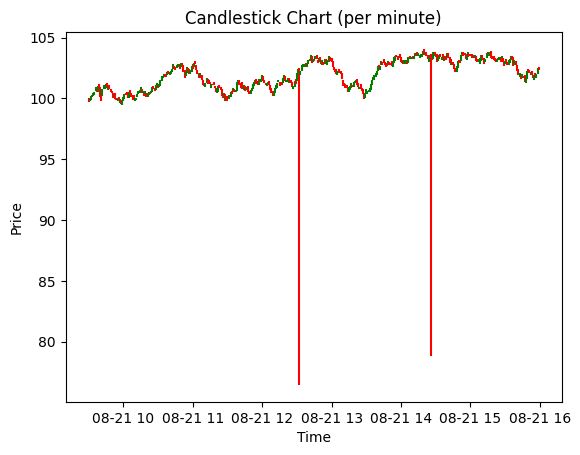

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data(with_outliers=True, outlier_prob=0.0005):
    # with_outliers: if True, generate outliers
    # outlier_prob: probability of generating an outlier
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff

        # Add outlier value or stay with the current price
        if with_outliers and np.random.rand() < outlier_prob:
            jump = np.random.uniform(1.1, 1.3) if np.random.rand() < 0.5 else np.random.uniform(0.7, 0.9)
            jump_price = price * jump
            results.append((float_to_time(time), jump_price))

        else:
            results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df
    
def candlestick(df, c = "hour"):
    time = {"hour": df['time'].dt.hour,
            "minute": df['time'].dt.floor('min') }
    bar_width = {"hour": 0.8,
                 "minute": 0.0005}
    
    df['check_time'] = time[c]
    
    # мінімум та максимум по кожній хвилині
    minute_MM = df.groupby('check_time')['price'].agg(['min', 'max'])
    # first, last, height for each group
    minute_FL = df.groupby('check_time')['price'].agg(
        first='first',
        last='last',
        height=lambda x: x.iloc[-1] - x.iloc[0]
    )
    # Determine the color based on the height
    colors = np.where(minute_FL['height'] >= 0, 'green', 'red')
    
    # painting the candlestick chart
    plt.vlines(minute_MM.index, minute_MM['min'], minute_MM['max'], color=colors)
    plt.bar(minute_FL.index, minute_FL['height'], bottom=minute_FL['first'], color=colors, width=bar_width[c])
    
    plt.xlabel("Time")  
    plt.ylabel("Price")  
    plt.title("Candlestick Chart (per minute)")

df = day_stock_data()
candlestick(df, "minute")
#candlestick(df)